In [2]:
from rfgap import RFGAP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dataset import dataprep
from phate import PHATE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import random

In [3]:
# datasets = ['hepatitis', 'lymphography', 'iris', 'parkinsons', 
#                        'wine', 'glass', 'heart_failure', 'ionosphere', 'seeds',
#                        'flare1', 'heart_disease', 'crx', 'balance_scale',
#                        'hill_valley', 'breast_cancer', 'diabetes', 'titanic', 'car', 
#                        'treeData', 'chess', 'tic-tac-toe', 'optdigits', 'waveform', 'mnist_test']


datasets = ['hepatitis', 'lymphography', 'iris', 'parkinsons', 
                       'wine', 'glass', 'heart_failure', 'ionosphere', 'seeds',
                       'flare1', 'heart_disease', 'crx', 'balance_scale',
                       'hill_valley', 'breast_cancer', 'diabetes', 'car', 
                       'chess', 'tic-tac-toe', 'optdigits', 'waveform']


print(len(datasets))

21


In [4]:
random.seed(42)
random_states = [random.randint(0, 10000) for _ in range(10)]

print(random_states)

[1824, 409, 4506, 4012, 3657, 2286, 1679, 8935, 1424, 9674]


In [5]:
df = pd.DataFrame()

for datatset in datasets:
    for random_state in random_states:
        df_temp = pd.read_csv('trust_tables/' + datatset + '_' + str(random_state) + '_trust_table.csv')

        df_temp['random_state'] = np.repeat(random_state, df_temp.shape[0])

        df = pd.concat([df, df_temp], axis=0)

In [6]:
df

,Dataset,Quantiles,Trust,Baseline Accuracy,Classifiable Accuracy,Accuracy Diff,Pct. Dropped,Accuracy Drop Ratio,random_state
0,hepatitis,0.05,0.389521,0.629032,0.641026,0.011993,0.050725,0.236441,1824
1,hepatitis,0.10,0.453650,0.629032,0.657658,0.028625,0.094203,0.303870,1824
2,hepatitis,0.15,0.491110,0.629032,0.676190,0.047158,0.137681,0.342518,1824
3,hepatitis,0.20,0.515157,0.629032,0.717172,0.088139,0.181159,0.486530,1824
4,hepatitis,0.25,0.548923,0.629032,0.752688,0.123656,0.224638,0.550468,1824
...,...,...,...,...,...,...,...,...,...
14,waveform,0.75,0.903889,0.843333,0.984889,0.141556,0.675000,0.209712,9674
15,waveform,0.80,0.916579,0.843333,0.986667,0.143333,0.720000,0.199074,9674
16,waveform,0.85,0.930565,0.843333,0.997037,0.153704,0.765000,0.200920,9674
17,waveform,0.90,0.943805,0.843333,0.997778,0.154444,0.810000,0.190672,9674


In [7]:
sns.set_theme()

C:\Users\rhodes8\AppData\Local\Temp\ipykernel_20064\3825032413.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95)


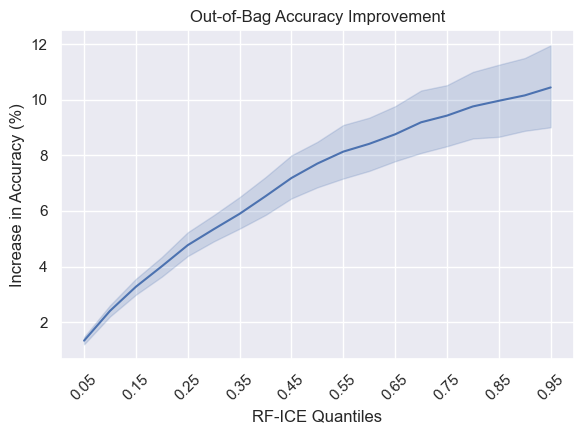

In [8]:
fig = plt.figure(figsize=(6, 4.5))


ax = sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95)
ax.set_title('Out-of-Bag Accuracy Improvement')
ax.set_ylabel('Increase in Accuracy (%)')
ax.set_xlabel('RF-ICE Quantiles')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/accuracy_diff.pdf')

C:\Users\rhodes8\AppData\Local\Temp\ipykernel_20064\595938648.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95)


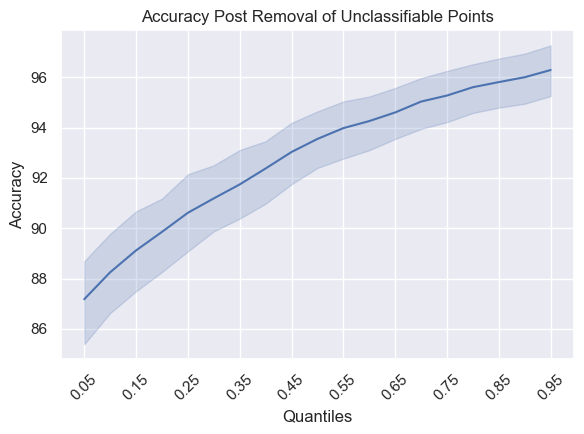

In [9]:
fig = plt.figure(figsize=(6, 4.5))


ax = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95)
ax.set_title('Accuracy Post Removal of Unclassifiable Points')
ax.set_ylabel('Accuracy')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/classifiable_accuracy.pdf')

C:\Users\rhodes8\AppData\Local\Temp\ipykernel_20064\3070616537.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax[0] = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
C:\Users\rhodes8\AppData\Local\Temp\ipykernel_20064\3070616537.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])


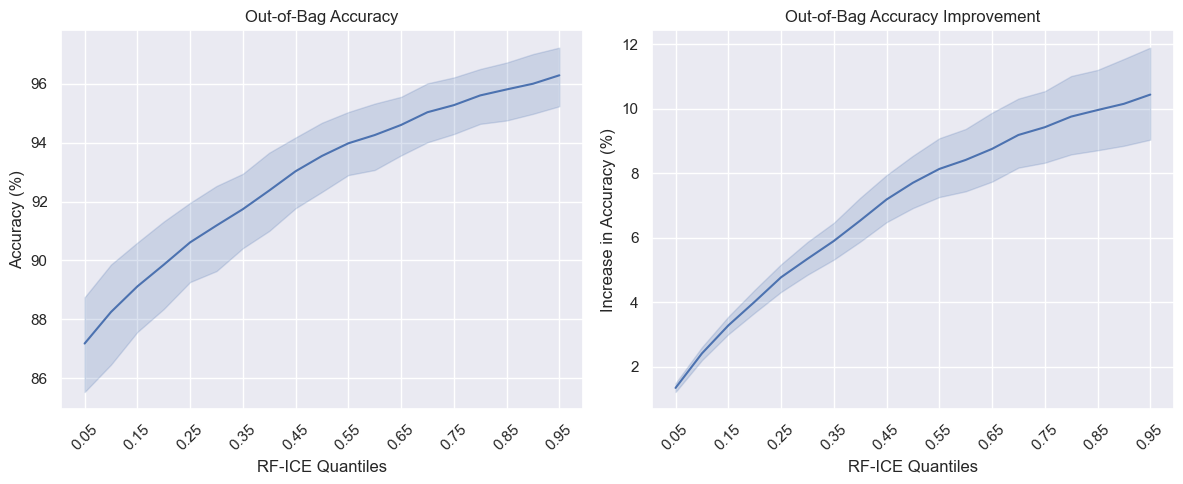

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0] = sns.lineplot(df, x = 'Quantiles', y = df['Classifiable Accuracy'] * 100, ci = 95, ax = ax[0])
ax[0].set_title('Out-of-Bag Accuracy')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_xlabel('RF-ICE Quantiles')
ax[0].set_xticks(df['Quantiles'].unique()[::2])
ax[0].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)


sns.lineplot(df, x = 'Quantiles', y = df['Accuracy Diff'] * 100, ci = 95, ax = ax[1])
ax[1].set_title('Out-of-Bag Accuracy Improvement')
ax[1].set_ylabel('Increase in Accuracy (%)')
ax[1].set_xlabel('RF-ICE Quantiles')
ax[1].set_xticks(df['Quantiles'].unique()[::2])
ax[1].set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.tight_layout()
plt.savefig('figures/accuracy_and_increase.pdf')


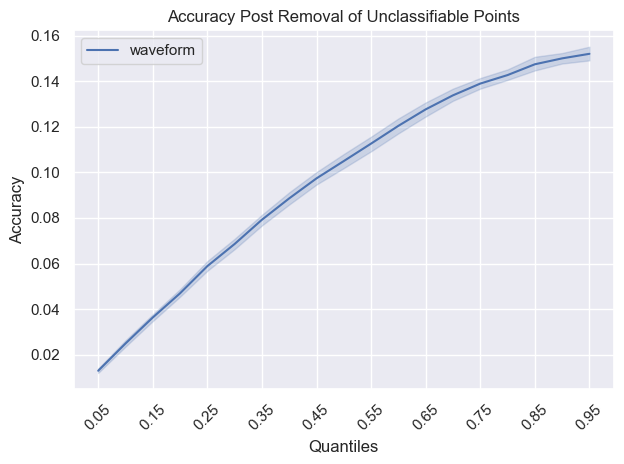

In [11]:
# data_subset = ['audiology', 'balance_scale', 'diabetes', 'glass', 'heart_disease']
data_subset = ['waveform']

temp_df = df[df['Dataset'].isin(data_subset)]


ax = sns.lineplot(data = temp_df, x='Quantiles', y = 'Accuracy Diff', hue='Dataset')
ax.set_title('Accuracy Post Removal of Unclassifiable Points')
ax.set_ylabel('Accuracy')
ax.set_xticks(df['Quantiles'].unique()[::2])
ax.set_xticklabels(df['Quantiles'].unique()[::2], rotation=45)

plt.legend(loc = None)
plt.tight_layout()
plt.show()


In [15]:
df.Dataset.sort_values().unique()

array(['balance_scale', 'breast_cancer', 'car', 'chess', 'crx',
       'diabetes', 'flare1', 'glass', 'heart_disease', 'heart_failure',
       'hepatitis', 'hill_valley', 'ionosphere', 'iris', 'lymphography',
       'optdigits', 'parkinsons', 'seeds', 'tic-tac-toe', 'waveform',
       'wine'], dtype=object)